## Implement CNN over MNIST dataset


MNIST dataset is a collection of 60000 28x28 graysclae images of handwritten digits 0-9 (10 classes) and a testing set with 10000 images. The first part of the project is to implement a CNN over this dataset




In [1]:
# Importing the necessary libraries used for the code
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from keras.optimizers import RMSprop, adam
from keras.callbacks import TensorBoard

Using TensorFlow backend.


## 1.1 Loading the data

In [6]:
# loading the data
train_images=np.load('./MNIST/trainImages.npy')        # Loading training images
train_labels=np.load('./MNIST/trainLabels.npy')        # Loading training labels
test_images=np.load('./MNIST/testImages.npy')             # Loading test images
test_labels=np.load('./MNIST/testLabels.npy')             # Loading test labels

**Checking the shape of the dataset-** It's important to know the number of samples and the dimension of the data before it can be trained. 

In [7]:
# checking the data shape of the training images
print("train_images original shape", train_images.shape)
print("train_labels original shape", train_labels.shape)
print("test_images original shape", test_images.shape)
print("test_labels original shape", test_labels.shape)

train_images original shape (60000, 1, 28, 28)
train_labels original shape (60000, 10)
test_images original shape (10000, 1, 28, 28)
test_labels original shape (10000, 10)


## 1.2 Reshaping the data

In [8]:
# Since the data is not desired format, we are reshaping it. 
train_images = train_images.reshape(-1,28,28,1)
test_images = test_images.reshape(-1,28,28,1)


In [9]:
print("Reshaped trainind data format", train_images.shape)
print("Reshaped testing data format", test_images.shape)

Reshaped trainind data format (60000, 28, 28, 1)
Reshaped testing data format (10000, 28, 28, 1)


## 1.3 Normalizing the data
**Normalization**

We perform a grayscale normalization to reduce the effect of illumination differences.

Moreover CNN converges faster on [0..1] data than on [0..255].

In [10]:
# Normalize the data
train_images = train_images / 255.0
test_images = test_images / 255.0

## 1.4 Converting the type to float32

In [11]:
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

**DISPLAYING THE TRAINING DATA**

The labels are already encoded into one hot vector.

[0 0 0 0 1 0 0 0 0 0]


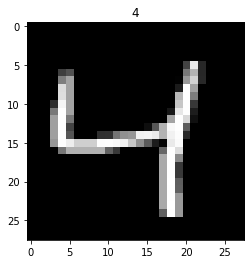

In [12]:
plt.imshow(train_images[2][:,:,0], cmap='gray')
plt.title(np.argwhere(train_labels[2]>0)[0][0])
print(train_labels[2])

In [13]:
image=[]
label=[]
for i in range (2,11):
    image.append(train_images[i][:,:,0])
    label.append(np.argwhere(train_labels[i]>0)[0][0])

In [14]:
def plot_images(images, class_true, class_pred=None):
    assert len(images) == len(class_true) == 9
    
    # Create figure with 3x3 sub-plots.
    f, ax = plt.subplots(3, 3)
    f.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(ax.flat):
        # Plot image.
        ax.imshow(images[i], cmap='binary')

        # Show true and predicted classes.
        if class_pred is None:
            xlabel = "True: {0}".format(class_true[i])
        else:
            xlabel = "True: {0}, Pred: {1}".format(class_true[i], class_pred[i])

        ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
        
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

Plotting the training data and its true labels

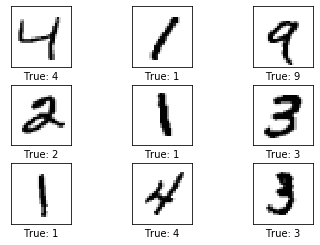

In [15]:
plot_images(image,label)

**Defining the characteristic parameters for the CNN such as batch size, filter size and pooling size**

In [16]:
#batch size
batch_size = 86
#epochs
epochs = 5 
# number of convolutional filters
filters = 32
# convolution filter size
filter_size = (3, 3)
# pooling size
pooling_size = (2, 2)
#%%


 

## 1.6 Create the Convolutional Neural Networks (CNN)
#### 1.  Define the model
#### 2.  Compile the model
#### 3.  Fit the model


**Types of layers used in the network**

**Convolution Layer:**

As part of the architecture in this case, I have used two 2D convolution layers.  

The size of the kernel and the filter size didn't affect the accuracy too much as I'm running it for only 5 epochs but on greater iterations, the difference will be noticable. Size of the filter used is 32 and 32 (i.e number of hidden neurons in each layer) for $1^{st}$ and $2^{nd}$ layers respectively. The size of the kernel used is [3,3] for both the layers. 

Non linearity used is ReLU activation function. 

**MaxPooling:**

Max pooling is a sample-based discretization process. The objective is to down-sample an input representation (image, hidden-layer output matrix, etc.), reducing its dimensionality and allowing for assumptions to be made about features contained in the sub-regions. The size of the maxpooling window is usually [2,2] to reduce the current layer size by half.

**Dropout Layer:**

As you can see from the code block, we’ll also be utilizing dropout in our network architecture. Dropout works by randomly disconnecting nodes from the current layer to the next layer. This process of random disconnects during training batches helps naturally introduce redundancy into the model — no one single node in the layer is responsible for predicting a certain class, object, edge, or corner.

Here we are choosing the probability to drop the connected edges to be 25%. the ideal range to select the probabilities is from 20% - 50%. We are applying 2 droput layers with probabilities of 25% and 50%. 

**Flatten:**

Our data is in 2 dimensions after convolution and MaxPooling. To use a fully connected layer for classification, we need a 1D vector so that all the features captured by the Convolution layer can be used to make the classification.

**Fully connected layer or dense layer:**

Since we need the linear output we have to add the fully connected layers and the function used for this is 'dense()'.
Here we are using 128 neurons in the hidden fully connected layer and since our ouput should be and number between 0-9 to classify the  MNIST data we are using 10 neuron in the output layer. The standard neuron numbers in the hidden layers are usually 64,128,256,512...

Relu non-linearity is used for the fully connected layer but the output layer uses a softmax non-linearity.

In [17]:
# Layer struture:
model = Sequential()
# Conv 1: First convolutional layer. Arguments: number of filters, filter size, padding mode, input structure.
model.add(Convolution2D(filters, (filter_size[0], filter_size[1]), input_shape=(28,28,1)))
# Activ1: First activation layer using relu activation function.
model.add(Activation('relu'))
# Conv 2: Second convolutional layer.
model.add(Convolution2D(filters, (filter_size[0], filter_size[1])))
# Activ2: Second activation layer using relu activation function.
model.add(Activation('relu'))
# MaxPool1: First pooling layer using maxpooling method, Argument: pooling size.
model.add(MaxPooling2D(pool_size=pooling_size))
# Dropout1: First dropout layer. Drop 25% of neurons.
model.add(Dropout(0.25))
# Flatten1: First flatten layer.
model.add(Flatten())
# FC1: First fully connected layer.
model.add(Dense(128))
# Activ 3: Third activation layer using relu activation function.
model.add(Activation('relu'))
# Dropout2: Second dropout layer. Drop 50% of neurons.
model.add(Dropout(0.5))
# FC2: Second fully connected layer.
model.add(Dense(10))
# Activ 3: Forth activation layer using softmax activation function.
model.add(Activation('softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


**Optimizer:**

We are using Adam optimizer which is equivalent to stochastic gradient descent which is widely used to solve convex optimization problems and efficient in solving non convex problems as well.
Adam is an optimization algorithm that can used instead of the classical stochastic gradient descent procedure to update network weights iterative based in training data.


Adam is known for combining the advantages of two other extensions of stochastic gradient descent. Specifically:

1. Adaptive Gradient Algorithm (AdaGrad) that maintains a per-parameter learning rate that improves performance on problems with sparse gradients (e.g. natural language and computer vision problems).

2. Root Mean Square Propagation (RMSProp) that also maintains per-parameter learning rates that are adapted based on the average of recent magnitudes of the gradients for the weight (e.g. how quickly it is changing). This means the algorithm does well on online and non-stationary problems (e.g. noisy).

Adam realizes the benefits of both AdaGrad and RMSProp. The algorithm calculates an exponential moving average of the gradient and the squared gradient, and the parameters beta1 and beta2 control the decay rates of these moving averages.

The parameters primarily used are:
1. Learning rate : The learning rate indicates the gradient step in the direction of the minima. 
2. Epsilon: A very small number to prevent any division by zero in the implementation (e.g. 10E-8).

In [18]:
# Define the optimizer
optimizer = adam(lr=0.001, epsilon=1e-08, decay=0.0)

In [19]:
# Compile the model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [20]:
# Fit the model
history = model.fit(train_images,train_labels, batch_size=batch_size,
                              epochs = epochs, 
                              verbose = 2)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
 - 129s - loss: 0.2448 - acc: 0.9262
Epoch 2/5
 - 124s - loss: 0.0817 - acc: 0.9757
Epoch 3/5
 - 58s - loss: 0.0662 - acc: 0.9791
Epoch 4/5
 - 57s - loss: 0.0535 - acc: 0.9836
Epoch 5/5
 - 56s - loss: 0.0450 - acc: 0.9864


**Observation:** 

Since our validation accuracy is more than the training accuracy in each itterations and since it is increasing continuously we can infer that our model will not overfit the testing data and will give the similar accuracy as the trainig accuracy.

**Plotting the loss function and accuracy**

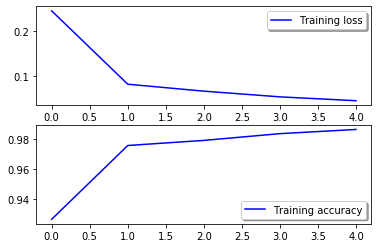

In [21]:
# Plot the loss and accuracy curves for training data
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
legend = ax[1].legend(loc='best', shadow=True)

## Running on Test data 

In [22]:
score = model.evaluate(test_images, test_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Test loss: 0.027908153447086807
Test accuracy: 0.9911
